#Initial pH-dependent binding affinity plots - Analyzing Nov 16 experiment

quickmodel.py from assaytools was run on these experiments using the following inputs:

In [1]:
from glob import glob
import numpy as np
inputs = {
    'xml_file_path' :  "./",
    'file_set'      :  {'Abl-pH7p29': glob("/Users/hansons/Documents/github/fluorescence-plotting-notebooks/ph-data-Nov16/Abl_pH7.29*.xml"),
                        'Abl-pH7p88': glob("/Users/hansons/Documents/github/fluorescence-plotting-notebooks/ph-data-Nov16/Abl_pH7.88*.xml")},
    'ligand_order'  :  ['Bosutinib','Bosutinib Isomer','Erlotinib','Gefitinib'],
    'section'       :  'em280_Copy2',
    'wavelength'    :  '480',
    'Lstated'       :  np.array([20.0e-6,9.15e-6,4.18e-6,1.91e-6,0.875e-6,0.4e-6,0.183e-6,0.0837e-6,0.0383e-6,0.0175e-6,0.008e-6,0.0001e-6], np.float64), # ligand concentration
    'Pstated'       :  1.0e-6 * np.ones([12],np.float64), # protein concentration, M
    'assay_volume'  :  100e-6, # assay volume, L
    'well_area'     :  0.3969, # well area, cm^2 for 4ti-0203 [http://4ti.co.uk/files/3113/4217/2464/4ti-0201.pdf]
    }


I'm going to import pickle files from the compounds I'm interested in.

In [2]:
import pickle
Abl_Bosutinib_pH7p29 = pickle.load( open( "./pH-data-Nov16/Abl-pH7p29-Bosutinib-AB_mcmc-2016-11-17 11:55.pickle", "rb" ) )

In [3]:
import matplotlib.pyplot as plt
%pylab inline
#plt.hist(Abl_Bosutinib_pH7p29['DeltaG'][0]);

Populating the interactive namespace from numpy and matplotlib


In [4]:
Abl_Bosutinib_pH7p88 = pickle.load( open( "./pH-data-Nov16/Abl-pH7p88-Bosutinib-AB_mcmc-2016-11-17 12:22.pickle", "rb" ) )

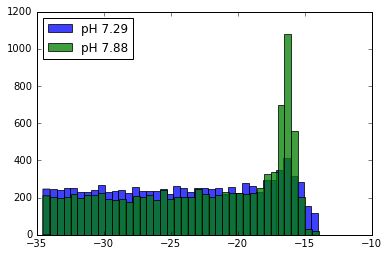

In [5]:
plt.hist(Abl_Bosutinib_pH7p29['DeltaG'][0], 40, alpha=0.75, label='pH 7.29');
plt.hist(Abl_Bosutinib_pH7p88['DeltaG'][0], 40, alpha=0.75, label='pH 7.88');
plt.legend(loc=0);

In [6]:
plt.clf()
Abl_Erlotinib_pH7p29 = pickle.load( open( "./pH-data-Nov16/Abl-pH7p29-Erlotinib-EF_mcmc-2016-11-17 12:09.pickle", "rb" ) )
Abl_Erlotinib_pH7p88 = pickle.load( open( "./pH-data-Nov16/Abl-pH7p88-Erlotinib-EF_mcmc-2016-11-17 12:35.pickle", "rb" ) )

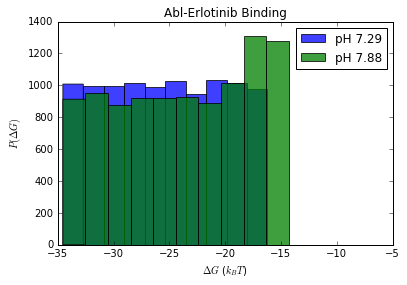

In [7]:
plt.hist(Abl_Erlotinib_pH7p29['DeltaG'][0], 10, alpha=0.75, label='pH 7.29');
plt.hist(Abl_Erlotinib_pH7p88['DeltaG'][0], 10, alpha=0.75, label='pH 7.88');
plt.xlabel('$\Delta G$ ($k_B T$)');
plt.ylabel('$P(\Delta G)$');
plt.title('Abl-Erlotinib Binding')
plt.xlim(-35,-5)
plt.legend(loc=0);

In [8]:
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


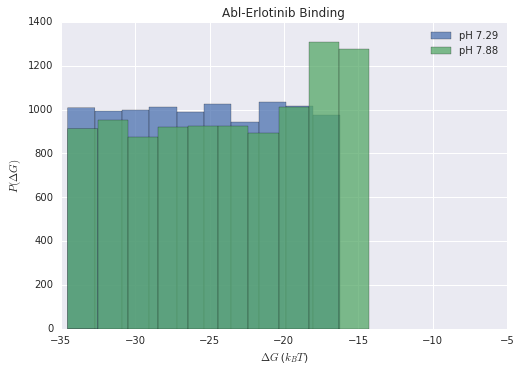

In [9]:
plt.hist(Abl_Erlotinib_pH7p29['DeltaG'][0], 10, alpha=0.75, label='pH 7.29');
plt.hist(Abl_Erlotinib_pH7p88['DeltaG'][0], 10, alpha=0.75, label='pH 7.88');
plt.xlabel('$\Delta G$ ($k_B T$)');
plt.ylabel('$P(\Delta G)$');
plt.title('Abl-Erlotinib Binding')
plt.xlim(-35,-5)
plt.legend(loc=0);

#### Got plot the fluorescence

In [10]:
import string
def reorder2list(data,well):

    sorted_keys = sorted(well.keys(), key=lambda k:well[k])

    reorder_data = []

    for key in sorted_keys:
        try:
            reorder_data.append(data[key])
        except:
            pass

    reorder_data = [r.replace('OVER','70000') for r in reorder_data]

    reorder_data = np.asarray(reorder_data,np.float64)

    return reorder_data

ALPHABET = string.ascii_uppercase

well = dict()
for j in string.ascii_uppercase:
    for i in range(1,25):
        well['%s' %j + '%s' %i] = i

In [11]:
from assaytools import platereader

singlets = {}

def singlet_fromspectra(file_set,ligand_order,wavelength):
    
    for protein in inputs['file_set'].keys():
    
        #concatenate four spectra xmls into one dictionary with all ligand data 
        my_file = []

        data = platereader.read_icontrol_xml(inputs['file_set']['%s'%protein][0])
        for file in inputs['file_set']['%s'%protein]:
            my_file.append(file)
            new_dict = platereader.read_icontrol_xml(file)
            for key in data:
                data[key] = dict(data[key].items()+new_dict[key].items())

        for i in range(0,7,2):
            protein_row = ALPHABET[i]
            buffer_row = ALPHABET[i+1]

            name = "%s-%s-%s%s"%(protein,ligand_order[i/2],protein_row,buffer_row)

            print(name)

            try:
                data_protein = platereader.select_data(data, inputs['section'], protein_row, wavelength = '%s' %wavelength)
                data_buffer = platereader.select_data(data, inputs['section'], buffer_row, wavelength = '%s' %wavelength)
            except:
                continue

            reorder_protein = reorder2list(data_protein,well)
            reorder_buffer = reorder2list(data_buffer,well)
        
            print reorder_protein
            print reorder_buffer
        
            singlets[name] = [reorder_protein, reorder_buffer]
        
    return singlets

Couldn't import dot_parser, loading of dot files will not be possible.


In [12]:
singlets = singlet_fromspectra(inputs['file_set'],inputs['ligand_order'],inputs['wavelength'])

Abl-pH7p29-Bosutinib-AB
[ 32183.  28765.  26214.  25986.  20283.  19097.  16201.   9757.   5623.
   3689.   2723.   2113.]
[ 7440.  6286.  3743.  1629.  1080.   942.   942.   965.  1003.  1075.
   978.  1171.]
Abl-pH7p29-Bosutinib Isomer-CD
[ 38254.  30934.  23436.  18662.  16698.  16751.  11555.   7917.   4870.
   3429.   2408.   1852.]
[ 7875.  6732.  4207.  1392.   967.   952.  1005.   967.   976.  1015.
   928.  1017.]
Abl-pH7p29-Erlotinib-EF
[ 25602.  20842.  17932.  16271.  15704.  12078.   8208.   5259.   3173.
   2531.   2233.   2140.]
[ 9598.  3849.  2272.  1338.  1204.  1087.  1046.  1106.   946.  1045.
  1043.   931.]
Abl-pH7p29-Gefitinib-GH
[ 23991.  18950.  12842.   8122.   4747.   3103.   2803.   2045.   3969.
   2033.   1842.   2057.]
[ 3756.  3077.  3277.  2154.  1333.  1174.  1190.  1272.  1150.  2579.
  2314.  1371.]
Abl-pH7p88-Bosutinib-AB
[ 23655.  27770.  22793.  19641.  17871.  17665.  15266.   8981.   5567.
   3381.   2607.   1726.]
[ 9264.  6420.  4038.  1903.  

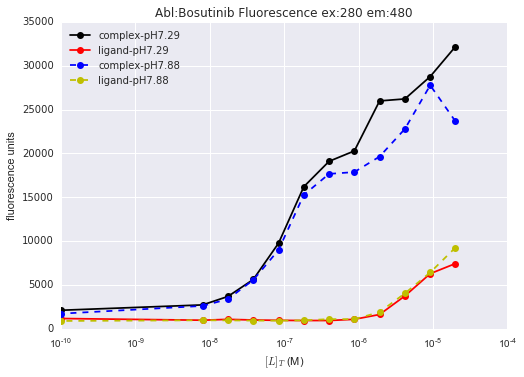

In [13]:
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p29-Bosutinib-AB'][0], 'ko-',label='complex-pH7.29');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p29-Bosutinib-AB'][1], 'ro-',label='ligand-pH7.29');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p88-Bosutinib-AB'][0], 'bo--',label='complex-pH7.88');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p88-Bosutinib-AB'][1], 'yo--',label='ligand-pH7.88');
plt.title('Abl:Bosutinib Fluorescence ex:280 em:480')
plt.xlabel('$[L]_T$ (M)');
plt.ylabel('fluorescence units');
plt.legend(loc=0);

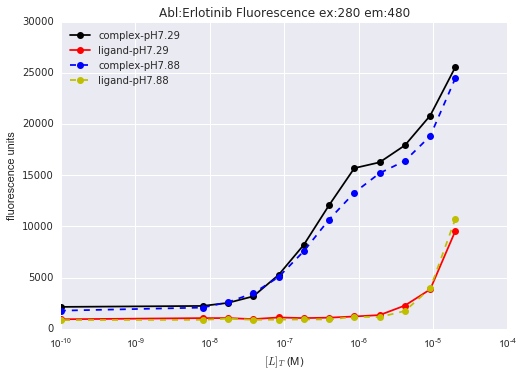

In [14]:
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p29-Erlotinib-EF'][0], 'ko-',label='complex-pH7.29');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p29-Erlotinib-EF'][1], 'ro-',label='ligand-pH7.29');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p88-Erlotinib-EF'][0], 'bo--',label='complex-pH7.88');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p88-Erlotinib-EF'][1], 'yo--',label='ligand-pH7.88');
plt.title('Abl:Erlotinib Fluorescence ex:280 em:480')
plt.xlabel('$[L]_T$ (M)');
plt.ylabel('fluorescence units');
plt.legend(loc=0);

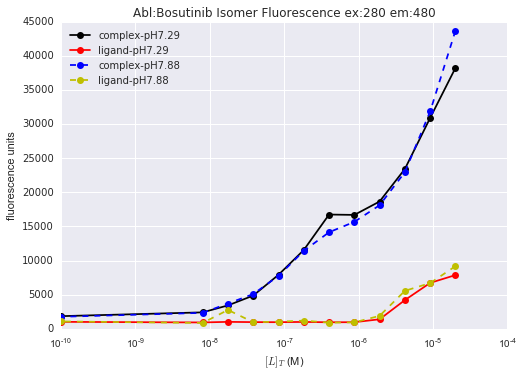

In [15]:
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p29-Bosutinib Isomer-CD'][0], 'ko-',label='complex-pH7.29');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p29-Bosutinib Isomer-CD'][1], 'ro-',label='ligand-pH7.29');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p88-Bosutinib Isomer-CD'][0], 'bo--',label='complex-pH7.88');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p88-Bosutinib Isomer-CD'][1], 'yo--',label='ligand-pH7.88');
plt.title('Abl:Bosutinib Isomer Fluorescence ex:280 em:480')
plt.xlabel('$[L]_T$ (M)');
plt.ylabel('fluorescence units');
plt.legend(loc=0);

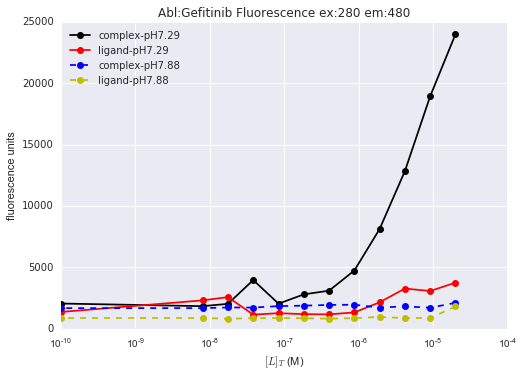

In [16]:
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p29-Gefitinib-GH'][0], 'ko-',label='complex-pH7.29');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p29-Gefitinib-GH'][1], 'ro-',label='ligand-pH7.29');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p88-Gefitinib-GH'][0], 'bo--',label='complex-pH7.88');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p88-Gefitinib-GH'][1], 'yo--',label='ligand-pH7.88');
plt.title('Abl:Gefitinib Fluorescence ex:280 em:480')
plt.xlabel('$[L]_T$ (M)');
plt.ylabel('fluorescence units');
plt.legend(loc=0);

## Can I make this prettier?

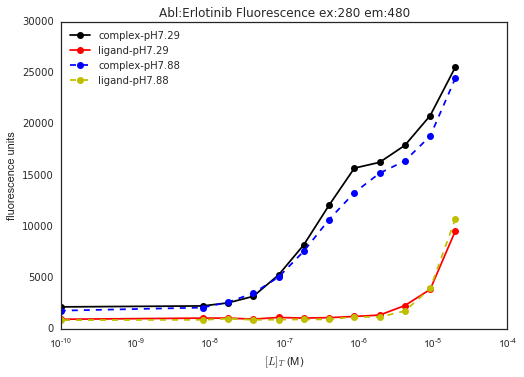

In [17]:
import seaborn as sns
sns.set_style("white")
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p29-Erlotinib-EF'][0], 'ko-',label='complex-pH7.29');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p29-Erlotinib-EF'][1], 'ro-',label='ligand-pH7.29');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p88-Erlotinib-EF'][0], 'bo--',label='complex-pH7.88');
plt.semilogx(inputs['Lstated'],singlets['Abl-pH7p88-Erlotinib-EF'][1], 'yo--',label='ligand-pH7.88');
plt.title('Abl:Erlotinib Fluorescence ex:280 em:480')
plt.xlabel('$[L]_T$ (M)');
plt.ylabel('fluorescence units');
plt.legend(loc=0);

## Playing with plotting the trace

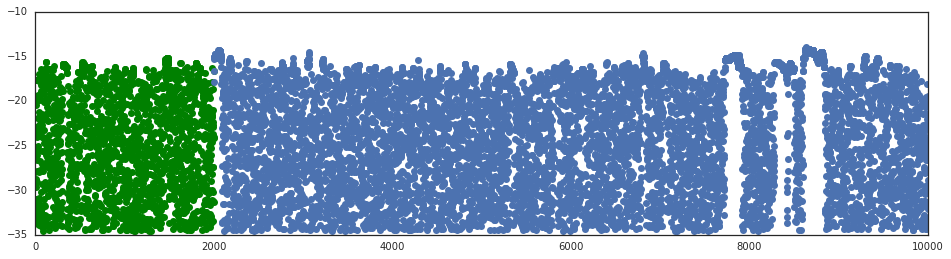

In [18]:
plt.figure(figsize=(16,4))

plt.plot(range(0,2000),Abl_Bosutinib_pH7p29['DeltaG'][0][:2000],'go');
plt.plot(range(2000,len(Abl_Bosutinib_pH7p29['DeltaG'][0])),Abl_Bosutinib_pH7p29['DeltaG'][0][2000:],'o');

In [19]:
import pymbar

In [20]:
[t,g,Neff_max] = pymbar.timeseries.detectEquilibration(Abl_Bosutinib_pH7p29['DeltaG'][0])

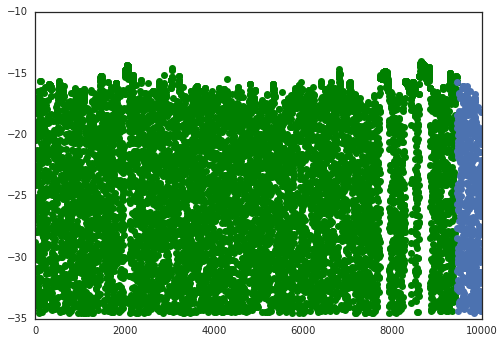

In [21]:
plt.clf()
plt.plot(range(0,t),Abl_Bosutinib_pH7p29['DeltaG'][0][:t],'go');
plt.plot(range(t,len(Abl_Bosutinib_pH7p29['DeltaG'][0])),Abl_Bosutinib_pH7p29['DeltaG'][0][t:],'o');

## Playing with coloring histogram

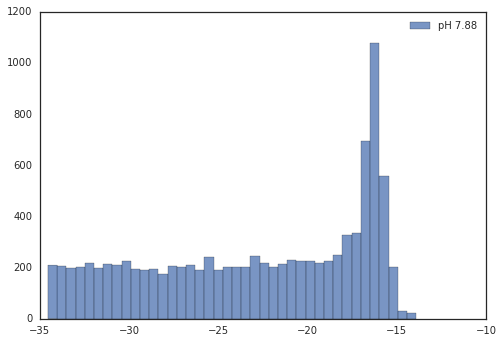

In [22]:
plt.hist(Abl_Bosutinib_pH7p88['DeltaG'][0], 40, alpha=0.75, label='pH 7.88');
plt.legend(loc=0);

In [23]:
[hist,bin_edges] = np.histogram(Abl_Bosutinib_pH7p88['DeltaG'][0],bins=40)

In [24]:
print hist,bin_edges

[ 210  205  197  203  218  199  215  212  227  193  189  194  177  207  204
  212  189  241  192  201  204  204  245  218  202  214  229  227  227  220
  225  249  327  337  697 1078  559  202   29   22] [-34.53741781 -34.02196446 -33.5065111  -32.99105774 -32.47560439
 -31.96015103 -31.44469767 -30.92924432 -30.41379096 -29.8983376
 -29.38288425 -28.86743089 -28.35197753 -27.83652418 -27.32107082
 -26.80561747 -26.29016411 -25.77471075 -25.2592574  -24.74380404
 -24.22835068 -23.71289733 -23.19744397 -22.68199061 -22.16653726
 -21.6510839  -21.13563055 -20.62017719 -20.10472383 -19.58927048
 -19.07381712 -18.55836376 -18.04291041 -17.52745705 -17.01200369
 -16.49655034 -15.98109698 -15.46564363 -14.95019027 -14.43473691
 -13.91928356]


In [25]:
np.abs(bin_edges[0]-bin_edges[1])

0.51545335638888901

In [26]:
binwidth = np.abs(bin_edges[0]-bin_edges[1])

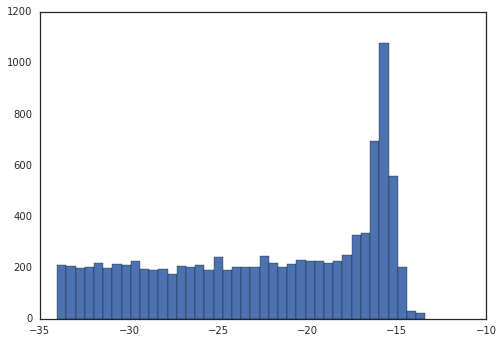

In [27]:
plt.bar(bin_edges[1:],hist,binwidth);

In [28]:
#Now let's calculate our 95% percentile data
interval = np.percentile(a=Abl_Bosutinib_pH7p88['DeltaG'][0], q=[2.5, 97.5])
interval

array([-33.93431736, -15.46522194])

In [29]:
clrs = [(0.7372549019607844, 0.5098039215686274, 0.7411764705882353) for xx in bin_edges]

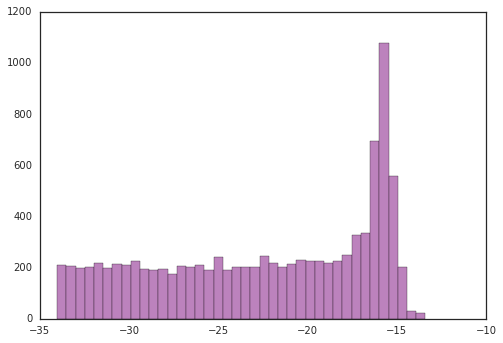

In [30]:
plt.bar(bin_edges[1:],hist,binwidth,color=clrs);

In [31]:
idxs = bin_edges.argsort()
idxs = idxs[::-1]
gray_before = idxs[bin_edges[idxs] < interval[0]]
gray_after = idxs[bin_edges[idxs] > interval[1]]

In [32]:
for idx in gray_before:
    clrs[idx] = (.5,.5,.5)
for idx in gray_after:
    clrs[idx] = (.5,.5,.5)

In [33]:
clrs

[(0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5),
 (0.7372549019607844, 0.5098039215686274, 0.7411764705882353),
 (0.7372549019607844, 0.5098039215686274, 0.7411764705882353),
 (0.7372549019607844, 0.5098039215686274, 0.7411764705882353),
 (0.7372549019607844, 0.5098039215686274, 0.7411764705882353),
 (0.7372549019607844, 0.5098039215686274, 0.7411764705882353),
 (0.7372549019607844, 0.5098039215686274, 0.7411764705882353),
 (0.7372549019607844, 0.5098039215686274, 0.7411764705882353),
 (0.7372549019607844, 0.5098039215686274, 0.7411764705882353),
 (0.7372549019607844, 0.5098039215686274, 0.7411764705882353),
 (0.7372549019607844, 0.5098039215686274, 0.7411764705882353),
 (0.7372549019607844, 0.5098039215686274, 0.7411764705882353),
 (0.7372549019607844, 0.5098039215686274, 0.7411764705882353),
 (0.7372549019607844, 0.5098039215686274, 0.7411764705882353),
 (0.7372549019607844, 0.5098039215686274, 0.7411764705882353),
 (0.7372549019607844, 0.5098039215686274, 0.7411764705882353),
 (0.737254901960784

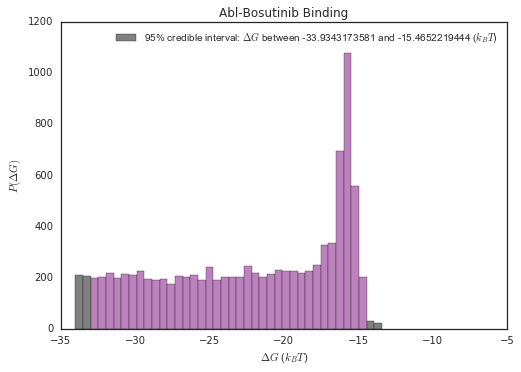

In [34]:
plt.bar(bin_edges[1:],hist,binwidth,color=clrs,label = '95%s credible interval: $\Delta G$ between %s and %s ($k_B T$)' %(r'%',interval[0],interval[1]) );
plt.xlabel('$\Delta G$ ($k_B T$)');
plt.ylabel('$P(\Delta G)$');
plt.title('Abl-Bosutinib Binding')
plt.xlim(-35,-5)
plt.legend(loc=0);

/Users/hansons/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


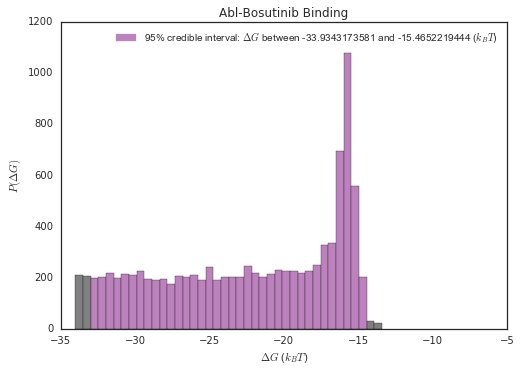

In [35]:
import matplotlib.patches as mpatches;

plt.bar(bin_edges[1:],hist,binwidth,color=clrs,);
plt.xlabel('$\Delta G$ ($k_B T$)');
plt.ylabel('$P(\Delta G)$');
plt.title('Abl-Bosutinib Binding')
plt.xlim(-35,-5)
legend = mpatches.Patch(color=(0.7372549019607844, 0.5098039215686274, 0.7411764705882353), label = '95%s credible interval: $\Delta G$ between %s and %s ($k_B T$)' %(r'%',interval[0],interval[1]) )
plt.legend(handles=[legend])
plt.legend(loc=0);


In [36]:
import seaborn as sns

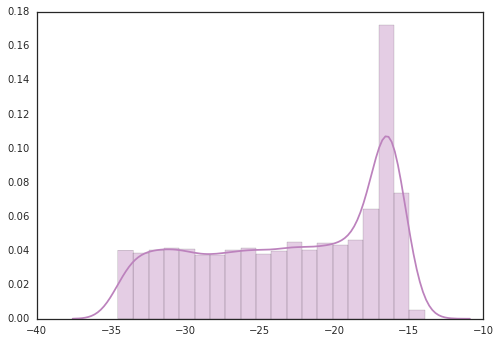

In [37]:
sns.distplot(Abl_Bosutinib_pH7p88['DeltaG'][0],color=(0.7372549019607844, 0.5098039215686274, 0.7411764705882353))

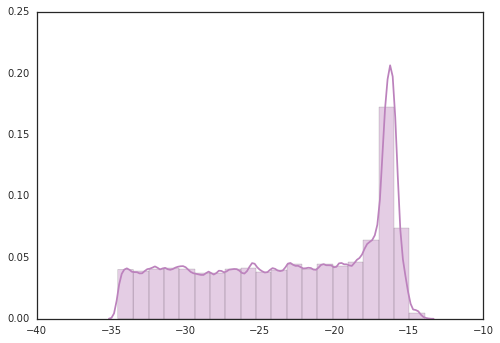

In [38]:
sns.distplot(Abl_Bosutinib_pH7p88['DeltaG'][0],kde_kws = {'bw':0.2} ,color=(0.7372549019607844, 0.5098039215686274, 0.7411764705882353))

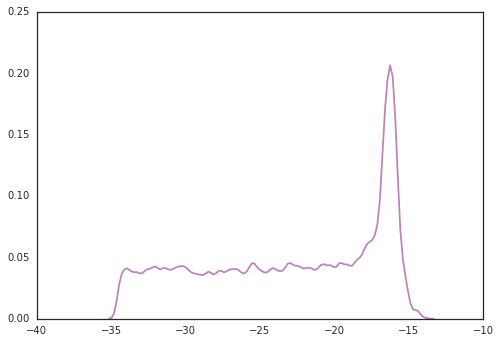

In [39]:
sns.kdeplot(Abl_Bosutinib_pH7p88['DeltaG'][0],bw=0.2,color=(0.7372549019607844, 0.5098039215686274, 0.7411764705882353))

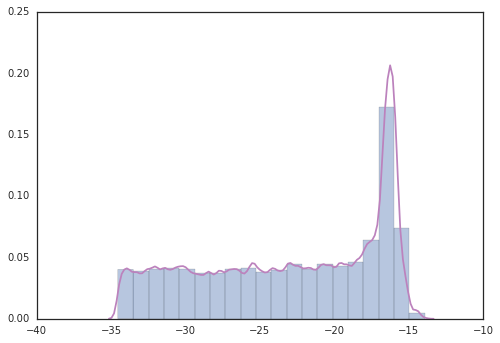

In [40]:
#damn thought I could color the histogram with hist_kws as found here (below) but couldn't.
# http://mlwhiz.com/blog/2015/09/13/seaborn_visualizations/
sns.distplot(
    Abl_Bosutinib_pH7p88['DeltaG'][0],
    kde_kws = {'bw':0.2,'color':(0.7372549019607844, 0.5098039215686274, 0.7411764705882353)});

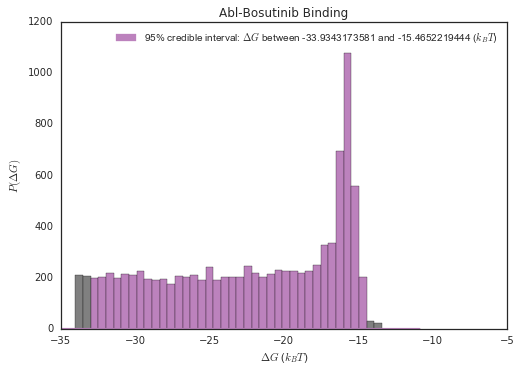

In [41]:
plt.clf();
plt.bar(bin_edges[1:],hist,binwidth,color=clrs);
sns.kdeplot(Abl_Bosutinib_pH7p88['DeltaG'][0],color=(0.7372549019607844, 0.5098039215686274, 0.7411764705882353),shade=False)
plt.xlabel('$\Delta G$ ($k_B T$)');
plt.ylabel('$P(\Delta G)$');
plt.title('Abl-Bosutinib Binding')
plt.xlim(-35,-5)
legend = mpatches.Patch(color=(0.7372549019607844, 0.5098039215686274, 0.7411764705882353), label = '95%s credible interval: $\Delta G$ between %s and %s ($k_B T$)' %(r'%',interval[0],interval[1]) )
plt.legend(handles=[legend])
plt.legend(loc=0);

In [42]:
# Ooooh! They're just different scales that's why I can't overlay them.

In [43]:
[normed_hist,normed_bin_edges] = np.histogram(Abl_Bosutinib_pH7p88['DeltaG'][0],bins=40,normed=True)

In [44]:
normed_binwidth = np.abs(normed_bin_edges[0]-normed_bin_edges[1])

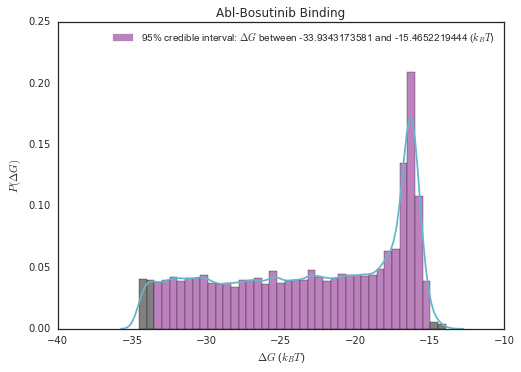

In [45]:
plt.clf();
plt.bar(normed_bin_edges[:-1],normed_hist,normed_binwidth,color=clrs);
sns.kdeplot(Abl_Bosutinib_pH7p88['DeltaG'][0],bw=.4,color=(0.39215686274509803, 0.7098039215686275, 0.803921568627451),shade=False)
plt.xlabel('$\Delta G$ ($k_B T$)');
plt.ylabel('$P(\Delta G)$');
plt.title('Abl-Bosutinib Binding')
plt.xlim(-40,-10)
legend = mpatches.Patch(color=(0.7372549019607844, 0.5098039215686274, 0.7411764705882353), label = '95%s credible interval: $\Delta G$ between %s and %s ($k_B T$)' %(r'%',interval[0],interval[1]) )
plt.legend(handles=[legend])
plt.legend(loc=0);

In [46]:
# What if we also add in our 50% interval to the plot
another_interval = np.percentile(a=Abl_Bosutinib_pH7p88['DeltaG'][0], q=[2.5, 50.0, 97.5])


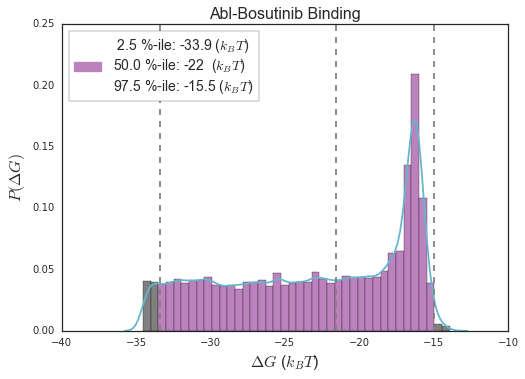

In [47]:
plt.clf();
plt.bar(normed_bin_edges[:-1],normed_hist,normed_binwidth,color=clrs);
sns.kdeplot(Abl_Bosutinib_pH7p88['DeltaG'][0],bw=.4,color=(0.39215686274509803, 0.7098039215686275, 0.803921568627451),shade=False)
plt.axvline(x=another_interval[0]+normed_binwidth,color=(0.5,0.5,0.5),linestyle='--')
plt.axvline(x=another_interval[1]+normed_binwidth,color=(0.5,0.5,0.5),linestyle='--')
plt.axvline(x=another_interval[2]+normed_binwidth,color=(0.5,0.5,0.5),linestyle='--')
plt.xlabel('$\Delta G$ ($k_B T$)',fontsize=16);
plt.ylabel('$P(\Delta G)$',fontsize=16);
plt.title('Abl-Bosutinib Binding',fontsize=16)
plt.xlim(-40,-10)
legend = mpatches.Patch(color=(0.7372549019607844, 0.5098039215686274, 0.7411764705882353), 
                        label = ' 2.5 %s-ile: %.3g ($k_B T$) \n50.0 %s-ile: %.3g  ($k_B T$) \n97.5 %s-ile: %.3g ($k_B T$)' 
                        %(r'%',another_interval[0],r'%',another_interval[1],r'%',another_interval[2]) )
plt.legend(handles=[legend],fontsize=14,loc=0,frameon=True);

In [48]:
#Will need to check this with something that has a tighter delG fit, because 
#I'm not sure if I've shifted the histogram when I shouldn't have...
#Does the x axis come from my bar plot or my kdeplot? If it's kdeplot than that should be fine...